<a href="https://colab.research.google.com/github/jinmyeonghee/Section1-Project/blob/main/n234a_interpreting_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요.
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요.
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요.
- **(Urclass Quiz) Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 양의 선형관계를 나타내는 특성을 고르세요.**
    - 1) LSTAT
    - 2) B
    - 3) TAX
    - 4) AGE


In [24]:
!pip install pdpbox
!pip install shap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[10:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


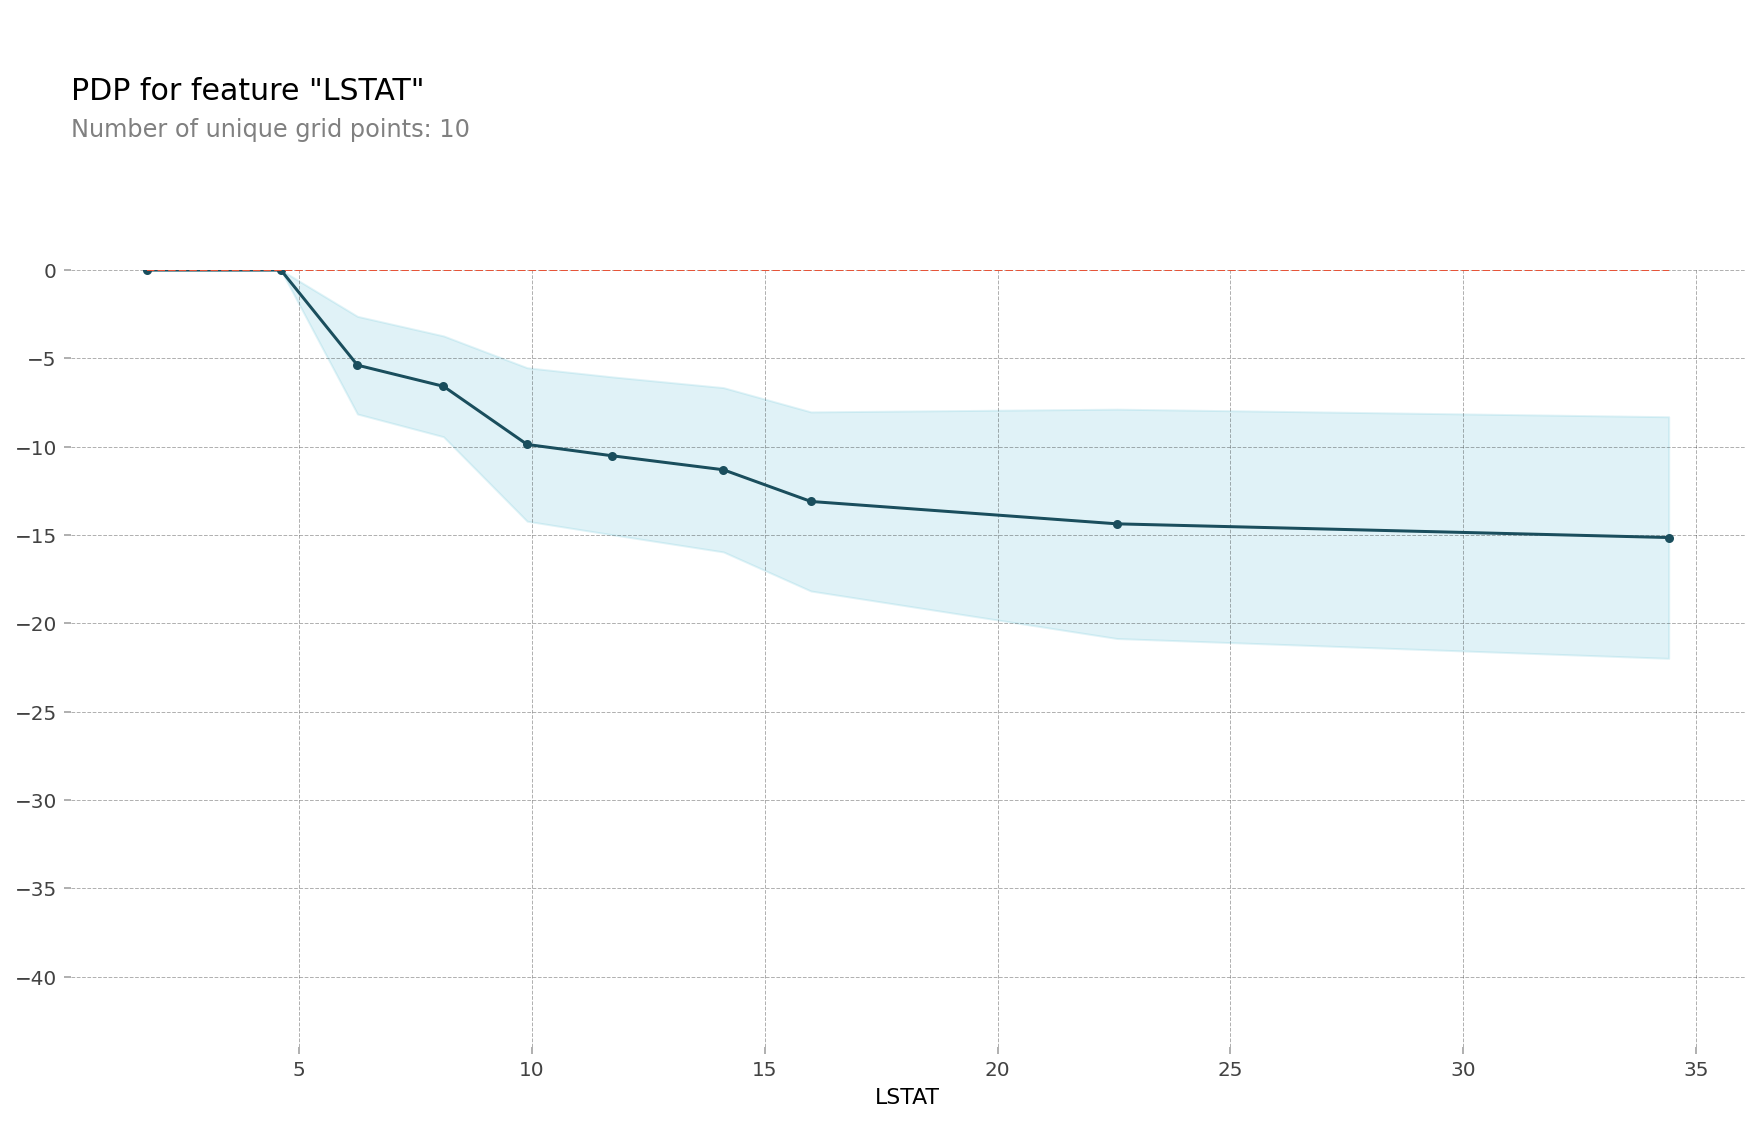

In [26]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

selected_feature = 'LSTAT'
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=X_test.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);
### Draw PDP plots ###


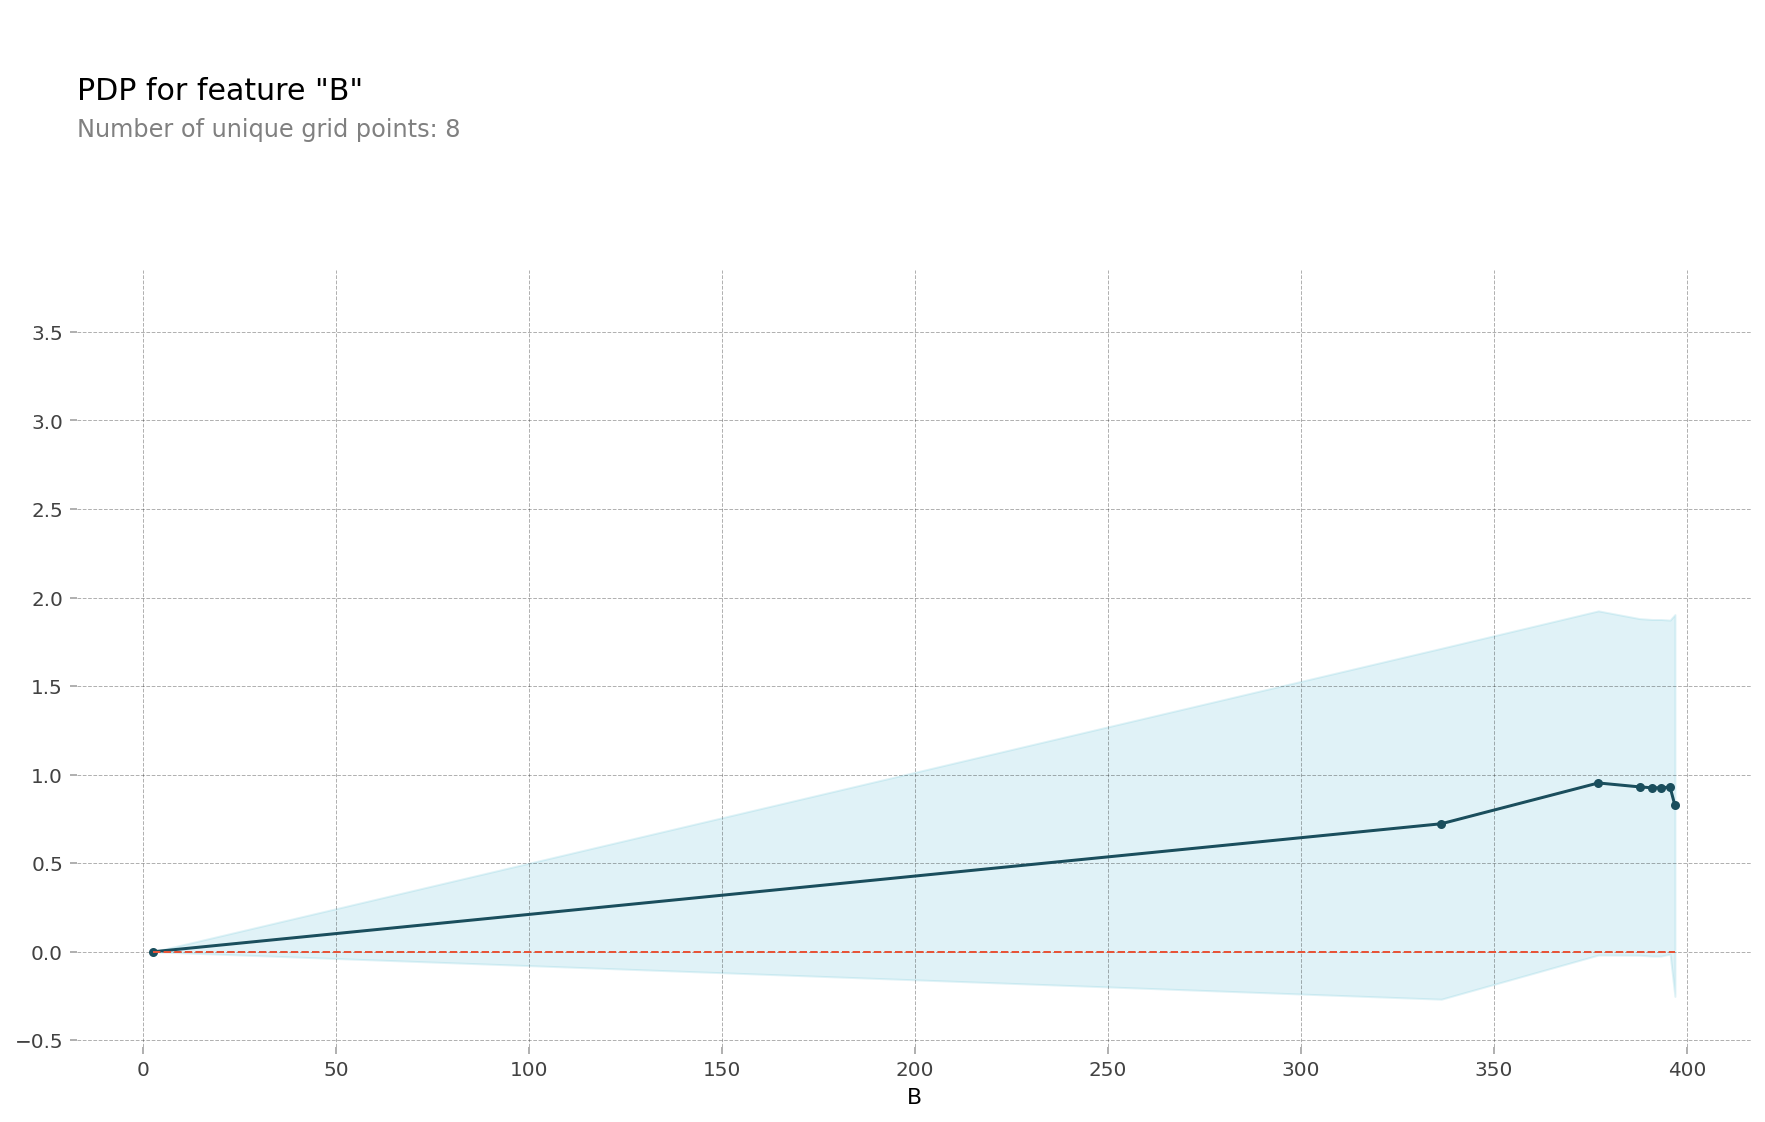

In [35]:
selected_feature = 'B'
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=X_test.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

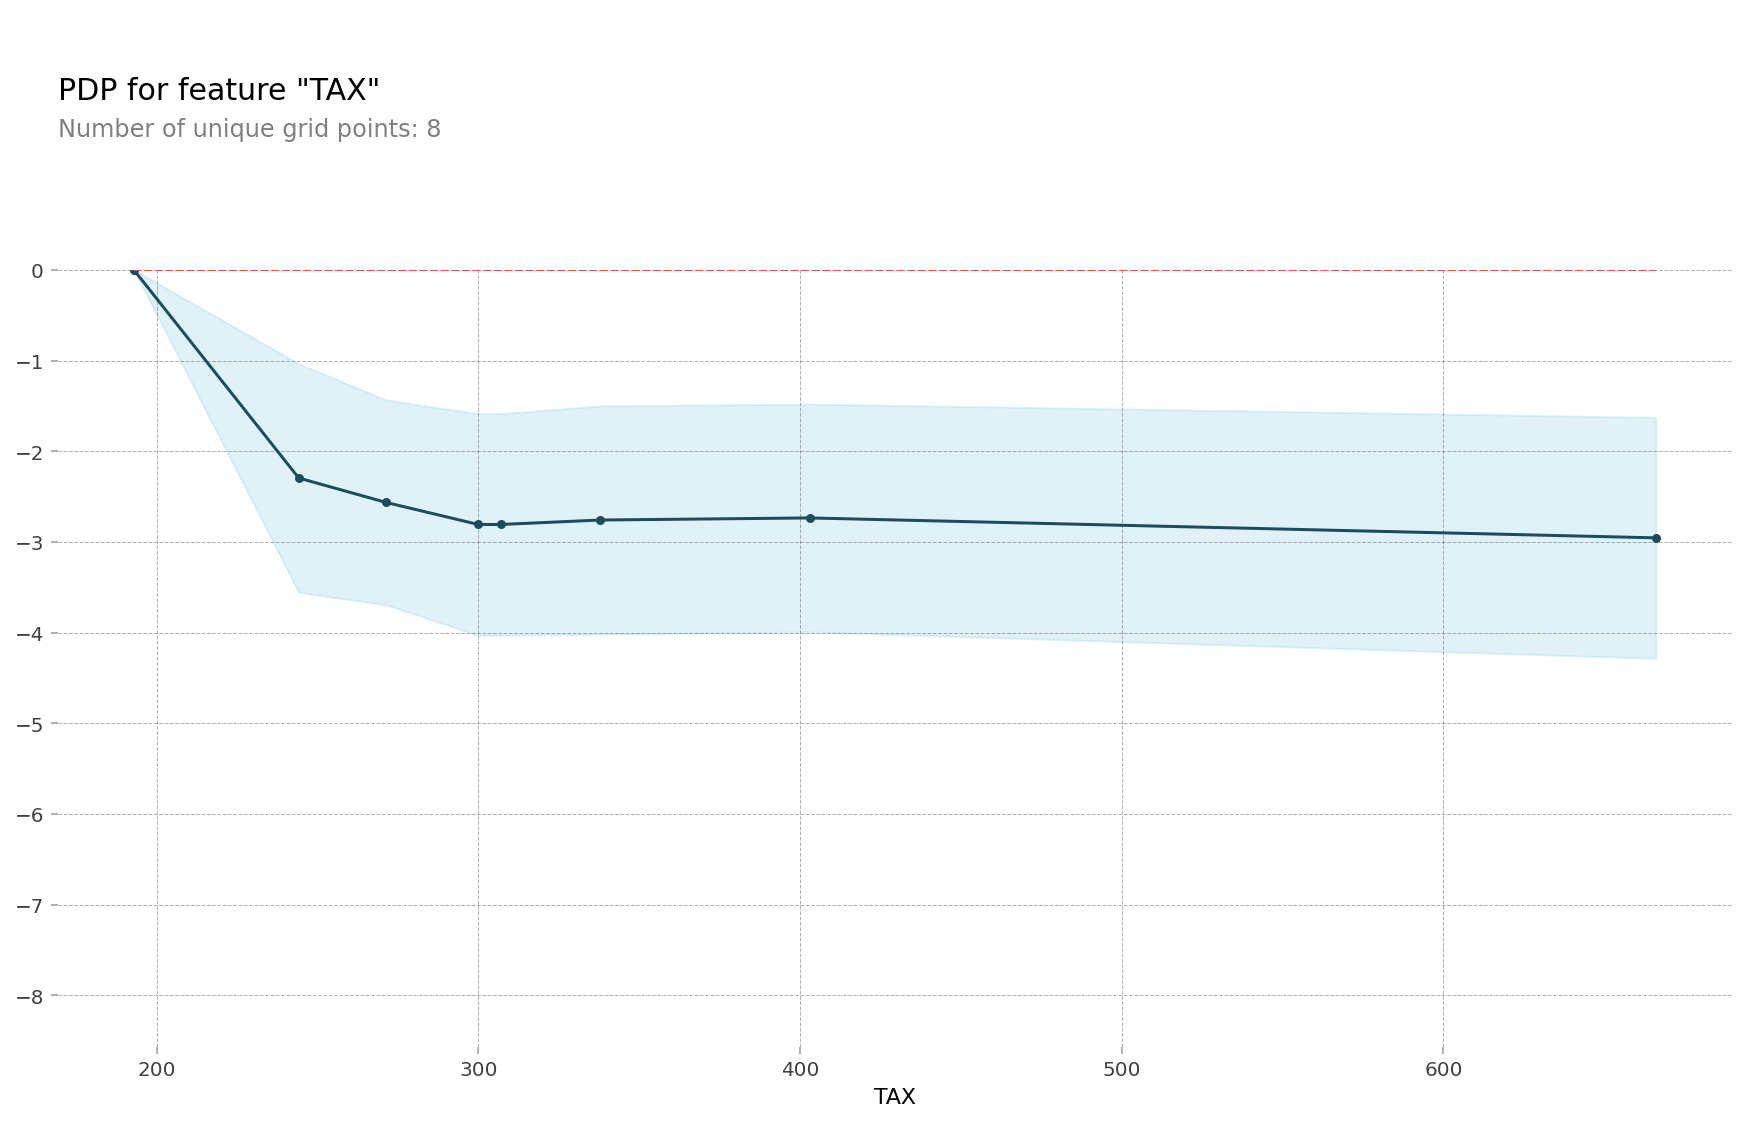

In [36]:
selected_feature = 'TAX'
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=X_test.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

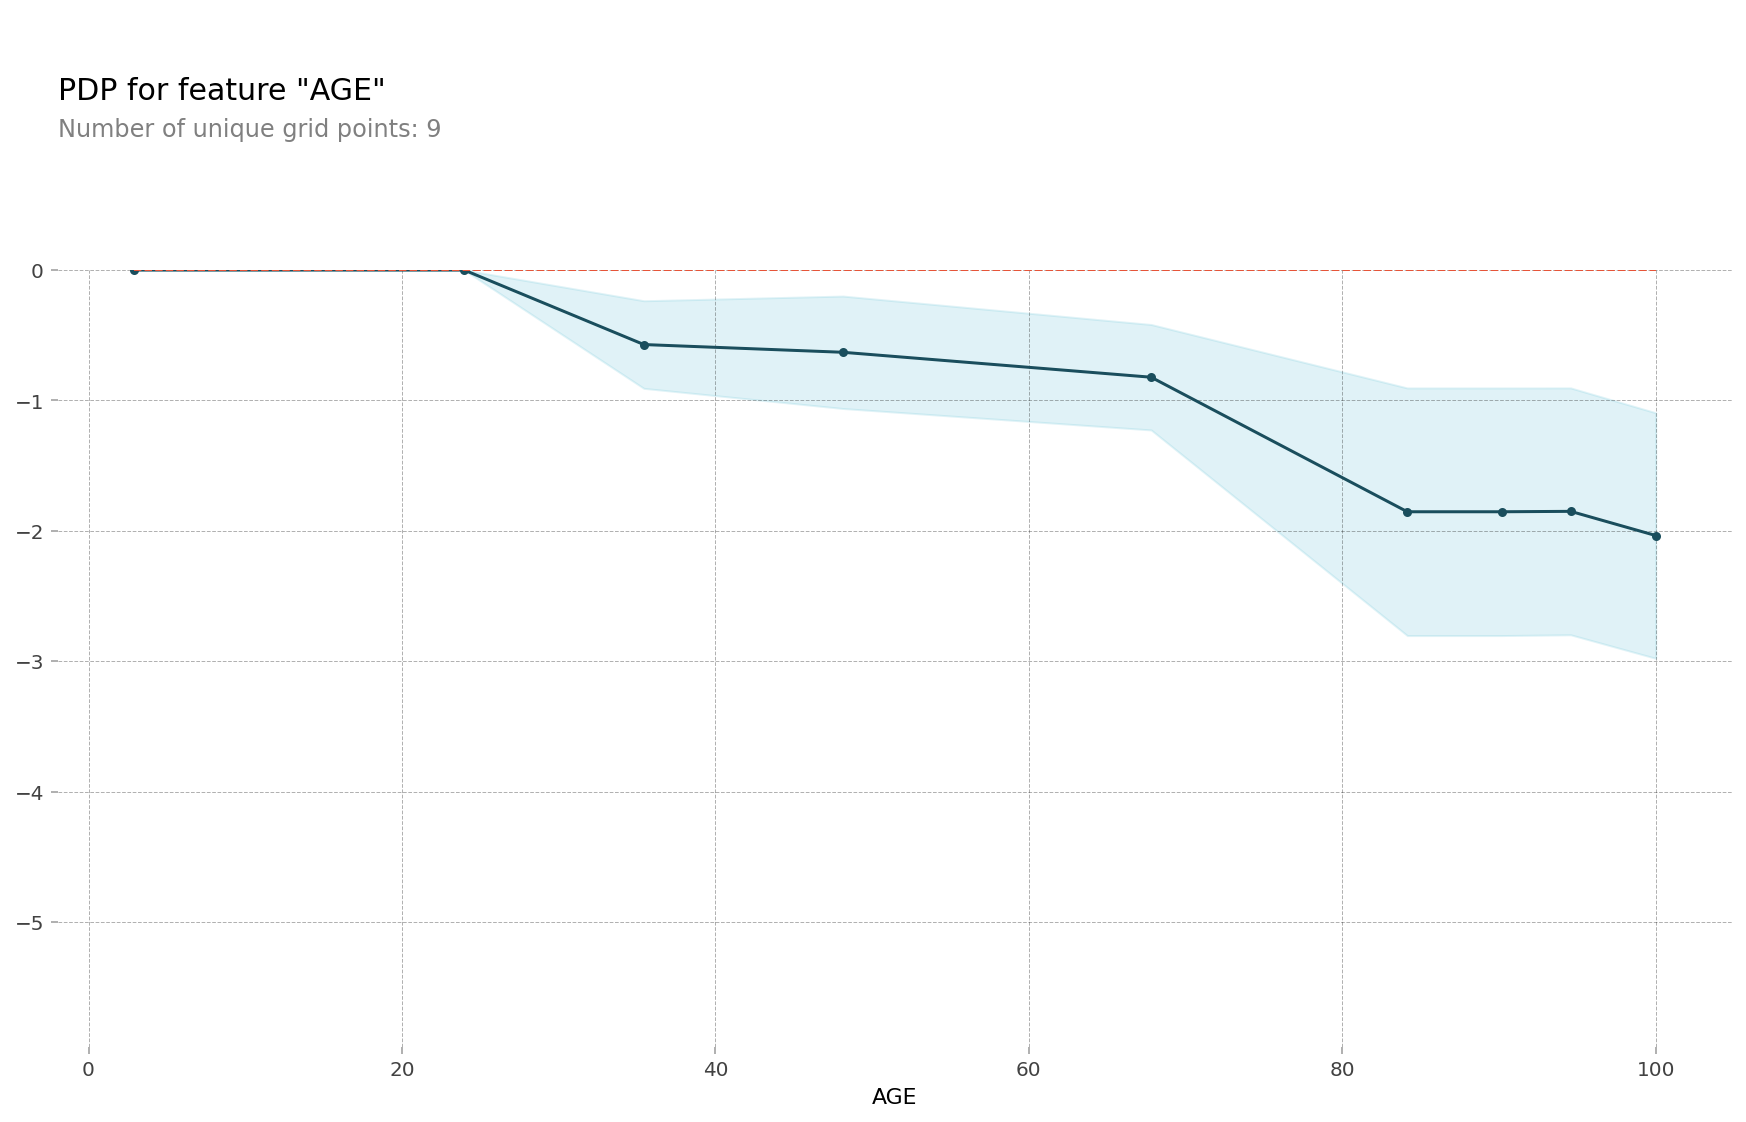

In [37]:
selected_feature = 'AGE'
pdp_dist = pdp_isolate(
    model=model,
    dataset=X_test,
    model_features=X_test.columns,
    feature=selected_feature
)
pdp.pdp_plot(pdp_dist, selected_feature);

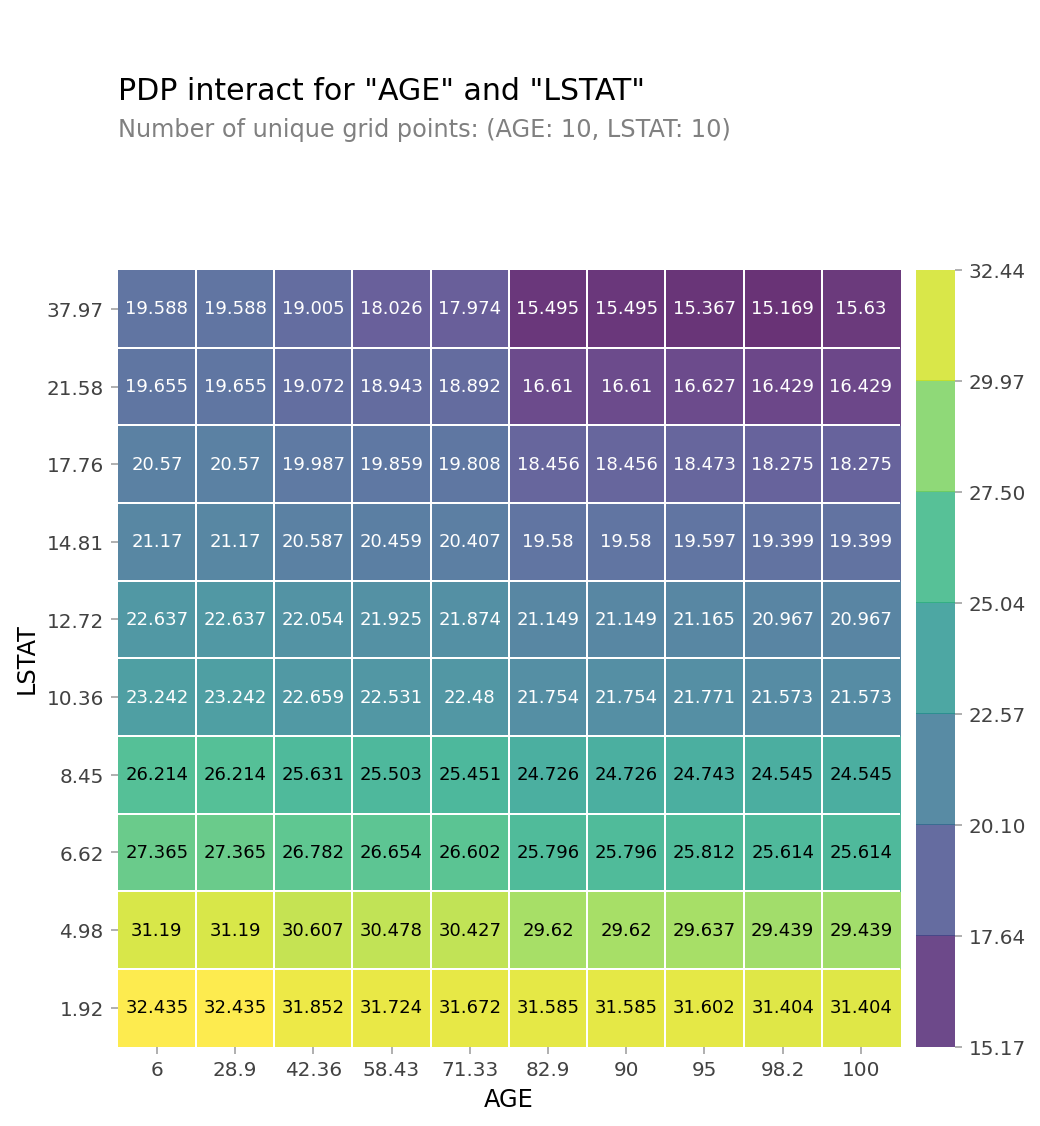

In [38]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['AGE', 'LSTAT']

interaction = pdp_interact(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요.
- **(Urclass Quiz) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택하세요.**
    - 1) force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2) SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3) SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4) 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.


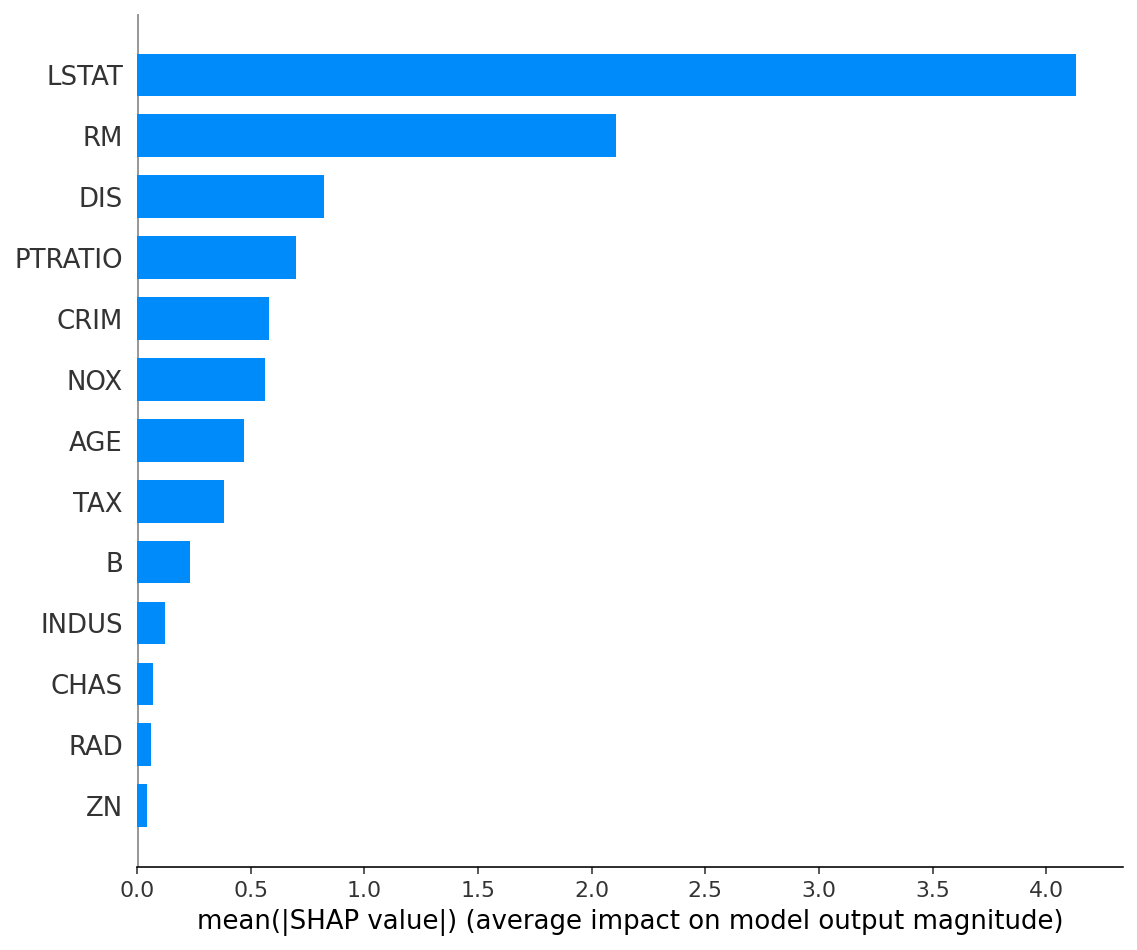

In [40]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

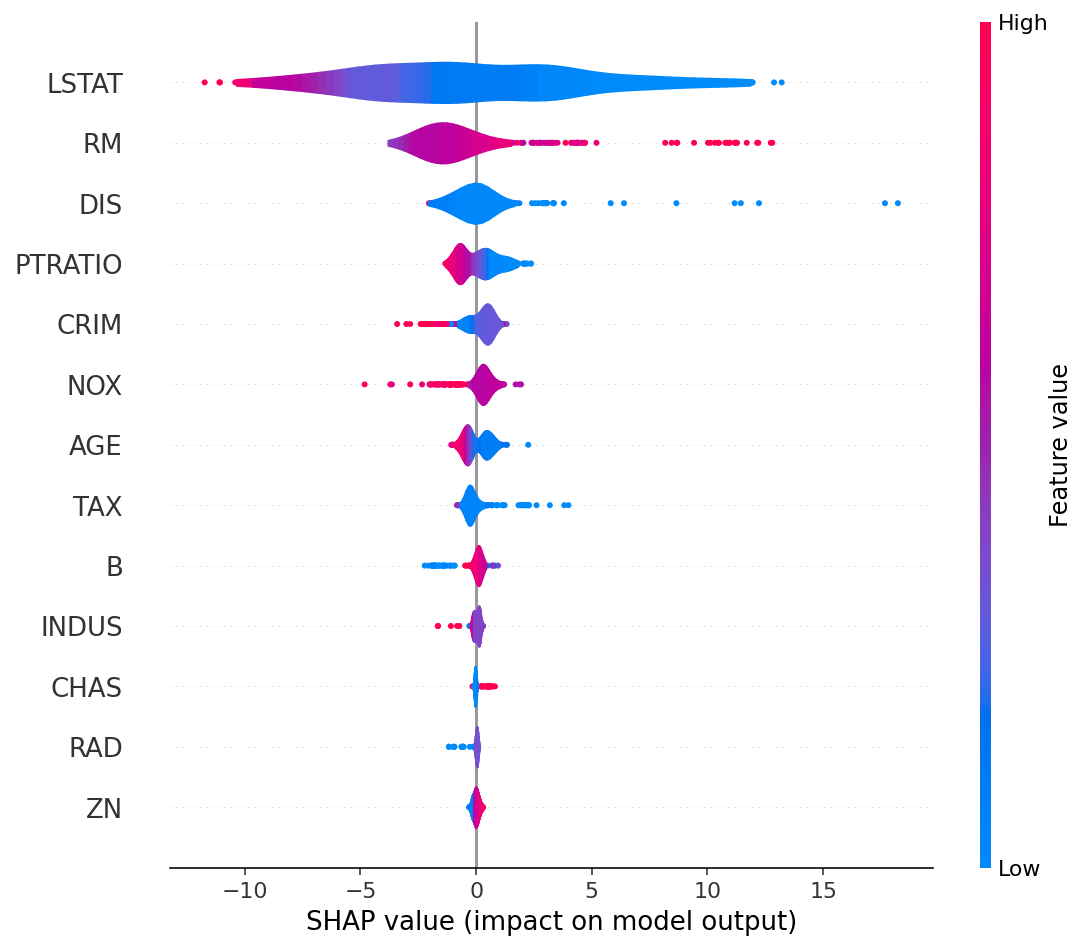

In [39]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='violin')
### Draw SHAP plots ###

 97%|=================== | 31625/32561 [00:26<00:00]       

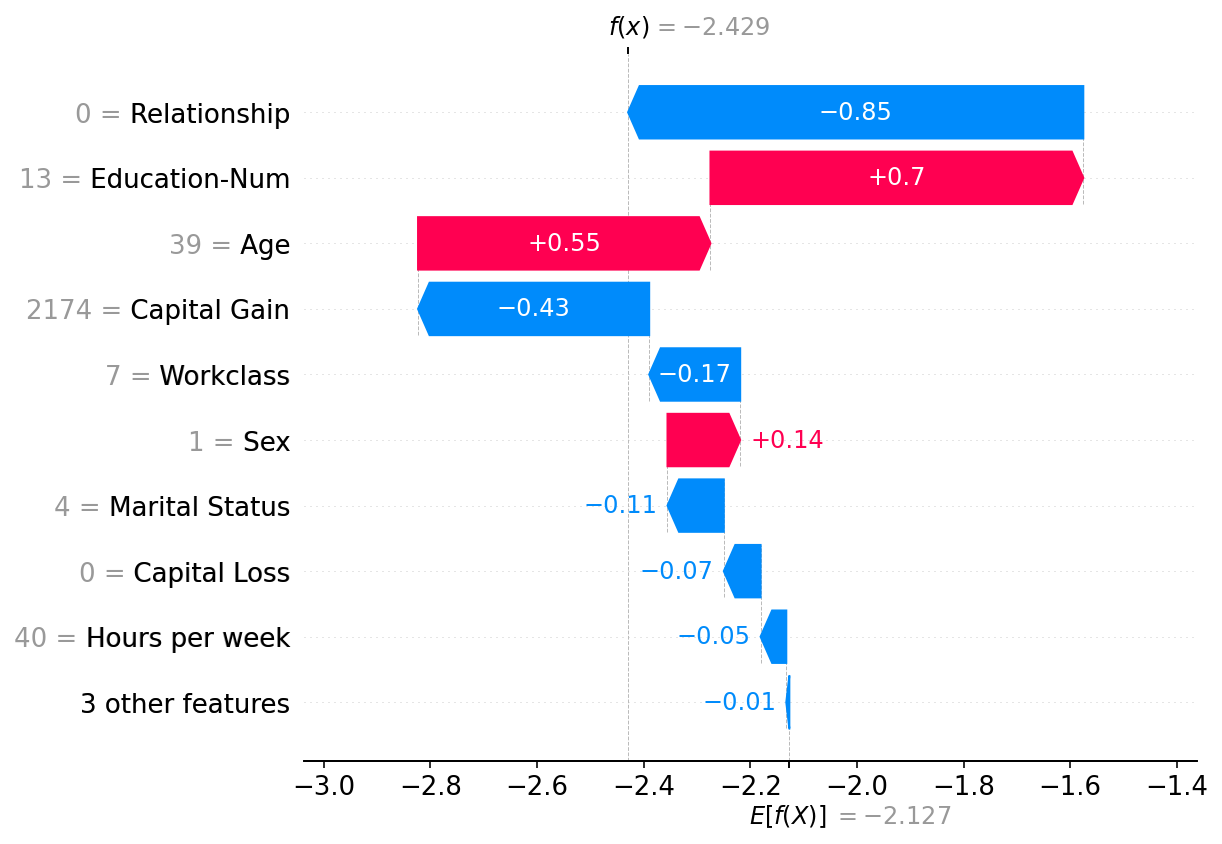

In [46]:
# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

plot = shap.plots.waterfall(shap_values[0])

## 🔥 도전과제(Github - Discussion)
> n233a의 도전과제에서 여러분의 프로젝트 데이터셋을 활용해 학습한 모델을 해석해 봅니다. <br>
지금까지 sprint3의 모든 도전과제를 수행하였다면, 의미있는 인사이트를 도출할 수 있도록 EDA나 다양한 모델 학습, 하이퍼파라미터 튜닝 등을 추가하여 더 develop 해 보시기 바랍니다. <br>
여러분의 프로젝트를 응원합니다!

### 1) PDP를 만들어 모델을 설명하세요. 
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요.
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요. 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

### 2) SHAP 라이브러리를 사용해 시각화를 하고 분석하세요. 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###